<a href="https://colab.research.google.com/github/lmcanavals/dip/blob/main/06_01_laplacian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sharpening in Space Domain

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

In [3]:
def show(im, size=8, color=None):
  _, ax = plt.subplots(figsize=(size, size))
  if color:
    ax.imshow(im, interpolation="nearest", cmap=color)
  else:
    ax.imshow(im, interpolation="nearest")
  plt.tight_layout()
  plt.show()

In [4]:
base = "https://raw.githubusercontent.com/lmcanavals/dip/main/imagenes/"

In [5]:
img1 = "filter.png"
url = f"{base}{img1}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 54553  100 54553    0     0   252k      0 --:--:-- --:--:-- --:--:--  253k


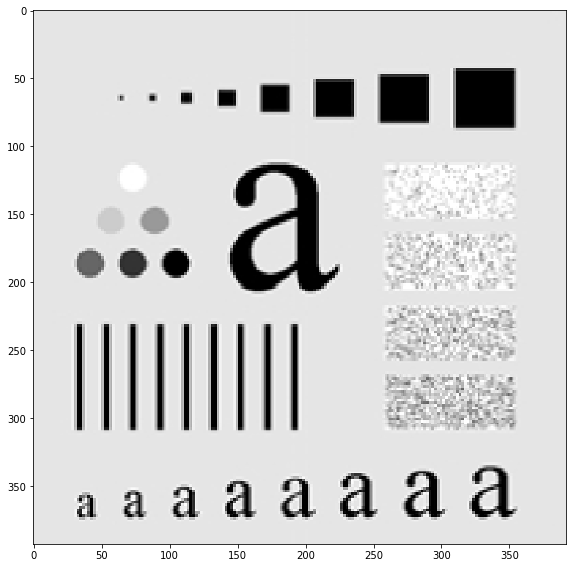

In [6]:
im = loadImg(img1)
show(im)

In [7]:
im.shape

(393, 392, 3)

(393, 392)


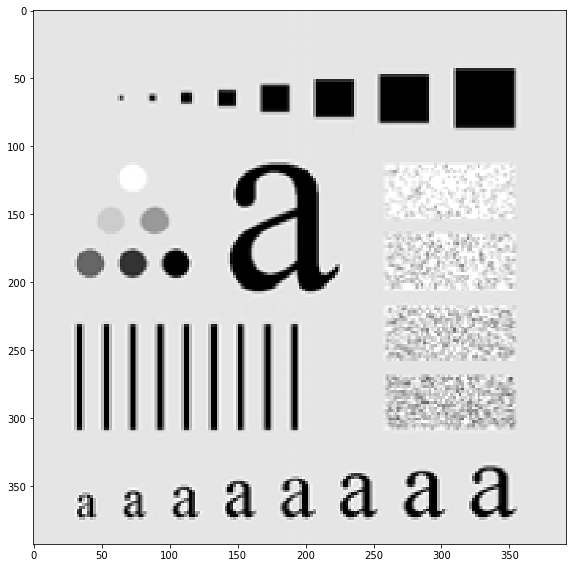

In [8]:
imgs = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(imgs.shape)
show(imgs, color="gray")

## Laplacian

In [12]:
def test(imgs, mask):
  imgs2 = cv2.filter2D(src=imgs, ddepth=-1, kernel=mask)
  plt.subplots(figsize=(10, 10))
  plt.subplot(1, 2, 1)
  plt.imshow(imgs, cmap="gray")
  plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.imshow(imgs2, cmap="gray")
  plt.axis("off")
  plt.show()

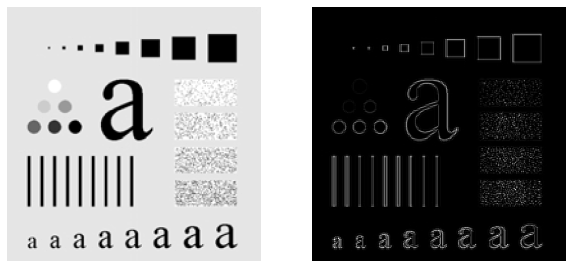

In [13]:
mask = np.array([0, 1, 0, 1, -4, 1, 0, 1, 0]).reshape(3, 3)
test(imgs, mask)

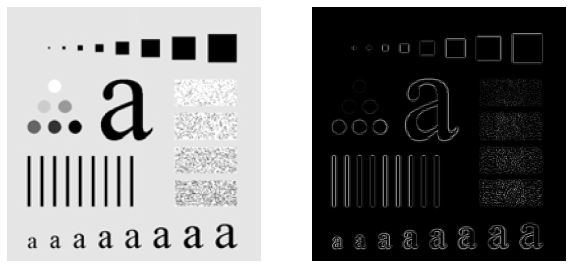

In [15]:
mask = np.array([0, -1, 0, -1, 4, -1, 0, -1, 0]).reshape(3, 3)
test(imgs, mask)

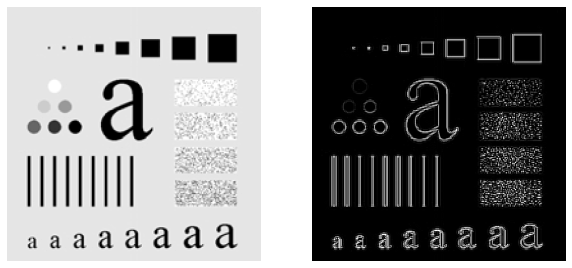

In [14]:
mask = np.array([1, 1, 1, 1, -8, 1, 1, 1, 1]).reshape(3, 3)
test(imgs, mask)

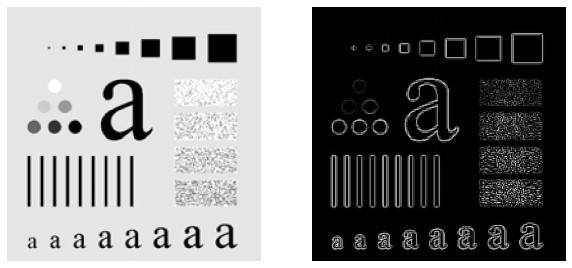

In [16]:
mask = np.array([-1, -1, -1, -1, 8, -1, -1, -1, -1]).reshape(3, 3)
test(imgs, mask)